# Train and Evaluation of a Simple Neural Network

## Table of Contents
- [Train a Neuran Network](#train-a-neuran-network)
- [Test the Neural Network on a Dataset](#test-the-neural-network-on-a-dataset)
- [References](#references)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('../data/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def claculate_loss(y, y_pred):
    error = y - y_pred
    loss = np.mean(error ** 2)
    return loss, error

## Train a Neuran Network

In [4]:
def forward(X, W1, W2):
    Z = tanh(np.dot(X, W1.T))
    y_pred = np.dot(Z, W2.T)  
    return y_pred, Z

In [14]:
def backward(X, y, M, iters, lr):
    N, D = X.shape
    W1 = np.random.randn(M, D) * 0.01 
    W2 = np.random.randn(1, M) * 0.01  
    error_over_time = []

    for _ in range(iters):
        y_pred, Z = forward(X, W1, W2)
        
        error = y - y_pred
        loss = np.mean(error ** 2)  # Calculate the mean squared error
        error_over_time.append(loss)

        dW2 = -2 * np.dot(error.T, Z) / N  
        dZ = np.dot(error, W2) * tanh_derivative(Z)  
        dW1 = -2 * np.dot(dZ.T, X) / N

        W1 -= lr * dW1
        W2 -= lr * dW2

    return W1, W2, np.array(error_over_time)

## Test the Neural Network on a Dataset

In [15]:
X = df.drop(columns=['quality']).values
y = df['quality'].values.reshape(-1, 1)

np.random.seed(13) 
shuffled_indices = np.random.permutation(len(X))
X, y = X[shuffled_indices], y[shuffled_indices]

In [16]:
split_index = len(X) // 2
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [17]:
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

In [18]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [34]:
M = 30              
iters = 1000      
learning_rate = 0.001

In [35]:
W1, W2, error_over_time1 = backward(X_train, y_train, M, iters, learning_rate)
y_pred_test, _ = forward(X_test, W1, W2)
rmse1 = np.sqrt(np.mean((y_test - y_pred_test) ** 2))
print(f"Root Mean Squared Error on Test Set: {rmse1}")

Root Mean Squared Error on Test Set: 0.6586538561045048


In [36]:
learning_rate = 0.1
W1, W2, error_over_time2 = backward(X_train, y_train, M, iters, learning_rate)
y_pred_test, _ = forward(X_test, W1, W2)
rmse2 = np.sqrt(np.mean((y_test - y_pred_test) ** 2))
print(f"Root Mean Squared Error on Test Set: {rmse2}")

Root Mean Squared Error on Test Set: 0.6579768878155448


In [37]:
learning_rate = 0.0001
W1, W2, error_over_time3 = backward(X_train, y_train, M, iters, learning_rate)
y_pred_test, _ = forward(X_test, W1, W2)
rmse3 = np.sqrt(np.mean((y_test - y_pred_test) ** 2))
print(f"Root Mean Squared Error on Test Set: {rmse3}")

Root Mean Squared Error on Test Set: 5.670617565199405


In [38]:
def plot_losses(train_losses, title, epochs=50):
    plt.figure(figsize=(10, 5)) 
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', alpha=0.5) 
    plt.xlabel('Epoch') 
    plt.ylabel('Loss') 
    plt.title(f'Training and Validation Loss Over Epochs for {title}') 
    plt.legend() 
    plt.show()

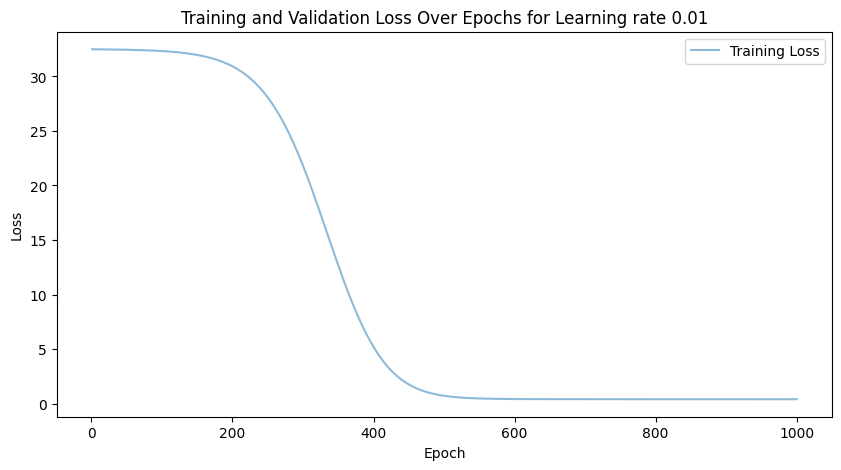

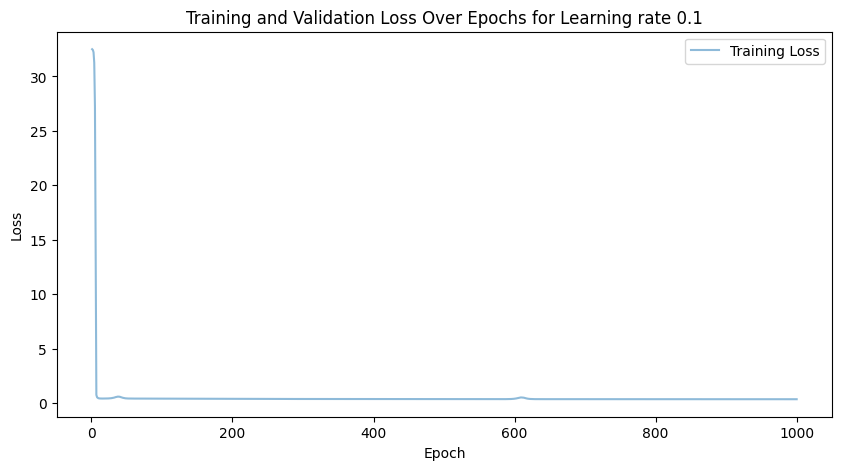

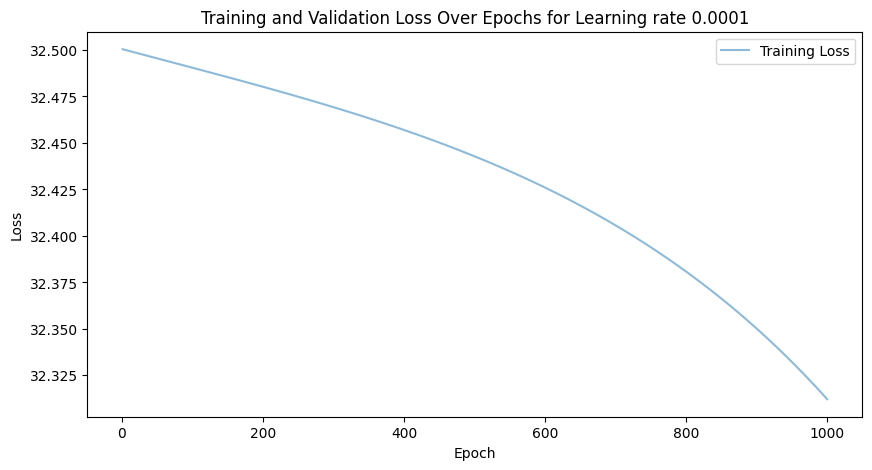

In [39]:
plot_losses(error_over_time1, 'Learning rate 0.01', iters)
plot_losses(error_over_time2, 'Learning rate 0.1', iters)
plot_losses(error_over_time3, 'Learning rate 0.0001', iters)

## References

- [Ref1]()
- [Ref2]()
- [Ref3]()